# Introduction

<center><img src="https://images.contentstack.io/v3/assets/blt731acb42bb3d1659/bltc101b5dbcbc42b4a/5fab31b724612d7400da4325/LOL.com.Banner.Article.HowlingAbyss.jpg"></center>

The dataset was scraped from my player profile on [https://na.op.gg/](https://na.op.gg/summoner/userName=toumeii) on August 6th, 2021. The dataset reached only up to June 6th, 2021. The champion roles dataset was from the champion page on the [League of Legends Offical Site](https://na.leagueoflegends.com/en-us/champions/). 

Aram is a League of Legends game mode where all ten players, split into 2 teams, are loaded into a one lane map where the goal is to capture the nexus of the other team. The champions played are randomly chosen from the list of champions thee player owns. There is a reroll system where you can roll for a different champion (max 2 rolls) and champs can be traded between players given they own them. Overall, champ select is more or less random.

The reason behind this data exploration is because sites out in the internet does not give detailed stats for the Aram game mode for League of Legends. Only simple match statistics were given. I wanted to know more about my Aram stats so here we are, although its only a subset of all my Aram games.

## Import Statements

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
from datetime import datetime

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format
register_matplotlib_converters()

## Load the Data

In [3]:
data = pd.read_csv('aram-data.csv')
data_roles = pd.read_csv('league_champions.csv')

# Preliminary Data Exploration

In [4]:
data.shape
# 237 rows and 8 columns

(237, 8)

In [5]:
data.head()
# Recent game is August 5th.

date game_result game_time        champion  kills  deaths  \
0  Aug 5 2021 11:04 PM      Defeat   13m 56s           Jayce      1       7   
1  Aug 3 2021 11:02 PM      Defeat    19m 1s        Kassadin     11      12   
2  Aug 3 2021 10:37 PM      Defeat   21m 18s  Nunu & Willump      5      13   
3  Aug 3 2021 10:12 PM      Defeat    19m 5s          Xerath      8       8   
4   Aug 3 2021 9:50 PM      Defeat   17m 52s           Jayce     10      12   

   assists  damage  
0       13  13,688  
1       21  26,923  
2       17  14,363  
3       25  33,598  
4       16  27,134

In [6]:
data.tail()
# Latest data is from June 6th.

date game_result game_time  champion  kills  deaths  \
232  Jun 7 2021 10:32 PM     Victory   18m 26s     Neeko      8       8   
233  Jun 7 2021 10:11 PM      Defeat    23m 7s   LeBlanc     10      11   
234   Jun 7 2021 9:44 PM      Defeat   17m 31s     Corki     21       9   
235  Jun 6 2021 10:41 PM     Victory    22m 0s    Viktor     16       6   
236  Jun 6 2021 10:16 PM      Defeat   14m 10s  Malzahar      5       6   

     assists  damage  
232       13  27,280  
233       10  21,027  
234       26  31,113  
235       25  51,615  
236        5   9,872

In [7]:
data.info()
# no null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         237 non-null    object
 1   game_result  237 non-null    object
 2   game_time    237 non-null    object
 3   champion     237 non-null    object
 4   kills        237 non-null    int64 
 5   deaths       237 non-null    int64 
 6   assists      237 non-null    int64 
 7   damage       237 non-null    object
dtypes: int64(3), object(5)
memory usage: 14.9+ KB


In [8]:
# Checking for duplicated data
print(f'Duplicated Data?: {data.duplicated().values.any()}') 

Duplicated Data?: False


In [9]:
data_roles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   champion  156 non-null    object
 1   role      156 non-null    object
dtypes: object(2)
memory usage: 2.6+ KB


In [10]:
data_roles.head()

champion      role
0   Aatrox   Fighter
1     Ahri      Mage
2    Akali  Assassin
3   Akshan  Marksman
4  Alistar      Tank

In [11]:
data_roles.tail()

champion      role
151      Zed  Assassin
152    Ziggs      Mage
153   Zilean   Support
154      Zoe      Mage
155     Zyra      Mage

# Cleaning Data

In [12]:
# Removing the time of day and changing 'date' to a datetime dtype
data.date = pd.to_datetime(data.date)
data.date = data.date.astype(str).str.split(' ', expand=True)[0]
data.date = pd.to_datetime(data.date)

In [13]:
# Rounding game_result to nearest minute
data.game_time = pd.to_timedelta(data.game_time).round('min')
data.game_time = data.game_time.astype(str).str.split(':', expand=True)[1]
data.rename(columns={'game_time': 'game_time_min'}, inplace=True)
data.game_time_min = pd.to_numeric(data.game_time_min)

In [14]:
# changing the damage score to integer
data.damage = data.damage.astype(str).str.replace(',', '')
data.damage = pd.to_numeric(data.damage)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           237 non-null    datetime64[ns]
 1   game_result    237 non-null    object        
 2   game_time_min  237 non-null    int64         
 3   champion       237 non-null    object        
 4   kills          237 non-null    int64         
 5   deaths         237 non-null    int64         
 6   assists        237 non-null    int64         
 7   damage         237 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 14.9+ KB


In [16]:
data.sample(5)

date game_result  game_time_min  champion  kills  deaths  assists  \
27  2021-07-27     Victory             18      Jhin     11       7       12   
135 2021-06-28      Defeat             12      Lulu      5       7        9   
131 2021-06-30      Defeat             13     Corki     11      10        9   
128 2021-06-30     Victory             29    Lucian     16      12       27   
92  2021-07-09     Victory             15  Tristana     12       5       14   

     damage  
27    17300  
135    8263  
131   19511  
128   55551  
92    25060

# Games Played

In [17]:
games_played = data.groupby('date', as_index=False).agg({'game_result': pd.Series.count})
games_played.rename(columns={'game_result': 'nr_games'}, inplace=True)

In [18]:
games_mean = games_played.nr_games.mean()
print(f'On average I play {games_mean:.2} Aram games a day.')

On average I play 4.1 Aram games a day.


In [19]:
moving_avg = games_played.set_index('date')
moving_avg = moving_avg.rolling(window=7).mean()

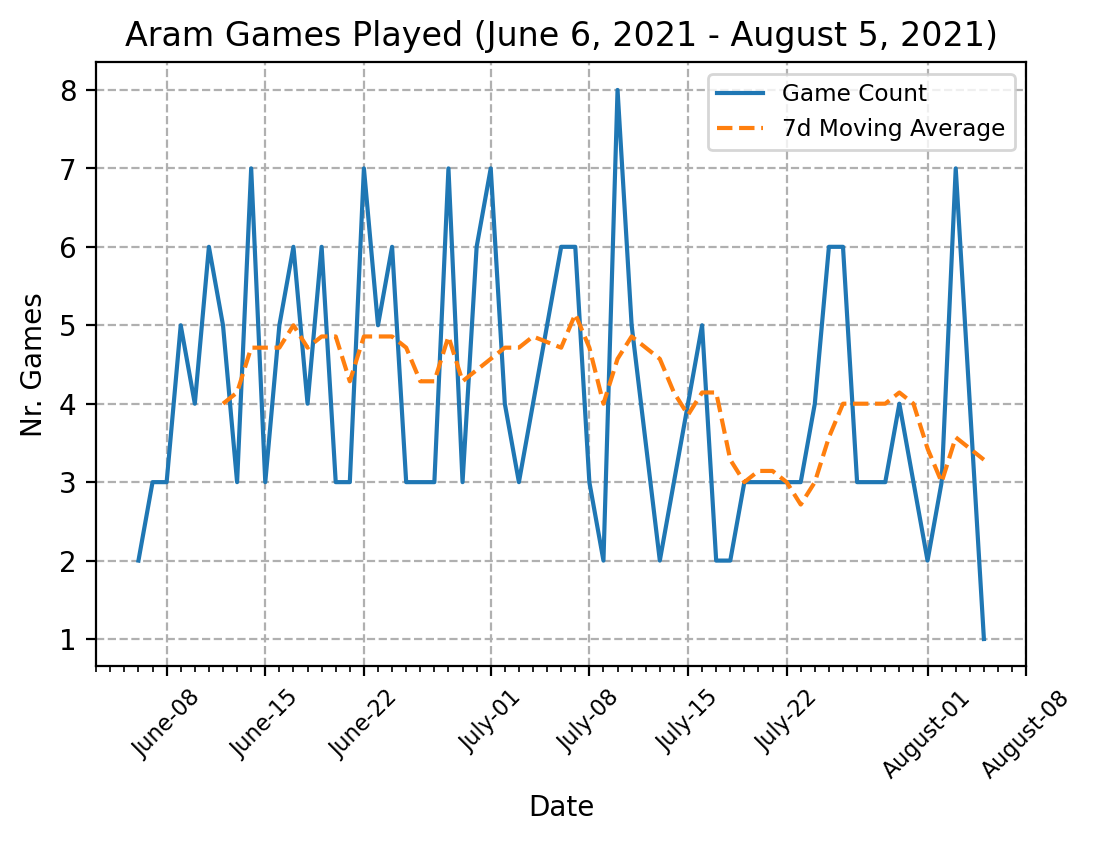

In [20]:
plt.figure(dpi=200)
plt.xticks(rotation=45, fontsize=8)
plt.title('Aram Games Played (June 6, 2021 - August 5, 2021)')
plt.xlabel('Date')
plt.ylabel('Nr. Games')

# Major and Minor locators
months = mdates.AutoDateLocator()
days = mdates.DayLocator()
months_fmt = mdates.DateFormatter('%B-%d')

plt.gca().xaxis.set_major_locator(months)
plt.gca().xaxis.set_major_formatter(months_fmt)
plt.gca().xaxis.set_minor_locator(days)

plt.grid(linestyle='--')

plt.plot(games_played.date,
        games_played.nr_games,
        label='Game Count')

plt.plot(moving_avg.index,
        moving_avg.values,
        linestyle='--',
        label='7d Moving Average')

plt.legend(fontsize='small')

plt.show()

# Win-Rate

In [21]:
win_rate = data.game_result.value_counts()

# plotly kept giving a future warning so changed to a dataframe.
win_rate = pd.DataFrame(win_rate)
win_rate.reset_index(inplace=True)
win_rate.columns = ['result', 'count']
win_rate

result  count
0   Defeat    120
1  Victory    117

In [22]:
win_rate_fig = px.pie(win_rate,
                      labels='result',
                     values='count',
                     names='result',
                     hole=0.5,
                     color='result',
                     color_discrete_map={'Victory': 'skyblue',
                                        'Defeat': 'crimson'},
                     title='Aram Win-Rate (June 6, 2021 - August 5, 2021)')
win_rate_fig.update_traces(textposition='outside', textinfo='percent+label')
win_rate_fig.show()

# Match Statistic

In [23]:
avg_game_time = data.game_time_min.mean()

# converting second to string to convert t0 minute-scale
minute = str(avg_game_time).split('.')[0]
second = str(avg_game_time).split('.')[1][:2]
second = str(pd.to_numeric(second) / 100 * 60).split('.')[0]

print(f'Average Aram game time: {minute} mins {second} seconds')

Average Aram game time: 18 mins 51 seconds


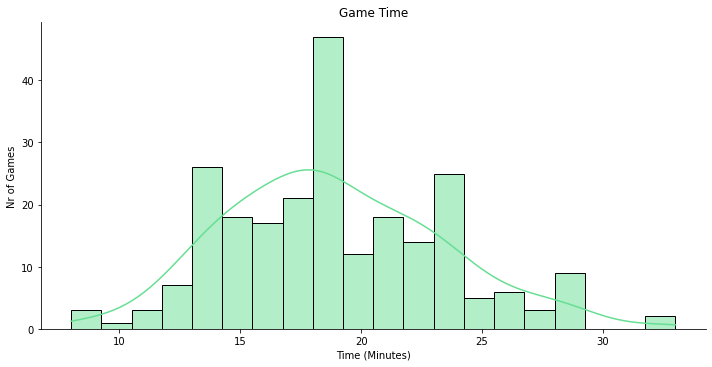

In [24]:
sns.displot(data.game_time_min,
           aspect=2,
           kde=True,
           color='#66DE93',
           bins=20)
plt.title(f'Game Time')
plt.xlabel('Time (Minutes)')
plt.ylabel('Nr of Games')
plt.show()

In [25]:
avg_kills = data.kills.mean()
avg_deaths = data.deaths.mean()
avg_assists = data.assists.mean()

print(f'Average kills per game: {avg_kills:.3}')
print(f'Average deaths per game: {avg_deaths:.3}')
print(f'Average assists per game: {avg_assists:.3}')

Average kills per game: 10.5
Average deaths per game: 9.14
Average assists per game: 19.2


In [26]:
data['KDA'] = (data.kills + data.assists) / data.deaths

print('KDA is short for Kills Death Assist and it is the determined by Kills+Assist / Death')
avg_kda = data.KDA.mean()
print(f'Average KDA: {avg_kda:.3}')

KDA is short for Kills Death Assist and it is the determined by Kills+Assist / Death
Average KDA: 3.71


This would mean that on average I would be able to take down 3 and sometimes 4 people down before I die in game.

# Champion Statistics

In [27]:
champion_occurence = data.champion.value_counts().sort_values(ascending=True)

In [28]:
champion_bar = px.bar(champion_occurence,
                     x=champion_occurence.values,
                     y=champion_occurence.index,
                     orientation='h',
                     color=champion_occurence.values,
                     color_continuous_scale='Tealgrn',
                     height=1500,
                     title='Champion Picks')
champion_bar.update_layout(coloraxis_showscale=False,
                          xaxis_title='Count',
                          yaxis_title='Champion')
champion_bar.show()

In [29]:
# converting champion_occurence from series to dataframe and renaming columns
champion_occurence = pd.DataFrame(champion_occurence)
champion_occurence.reset_index(inplace=True)
champion_occurence.columns = ['champion', 'total_games']

# finding the most played champ and the nr. of games with them
total_picks = champion_occurence.total_games.sum()
most_played_champ = champion_occurence.iloc[[-1]]
mpc_name = most_played_champ.champion.item()
mpc_total_played = int(most_played_champ.total_games.item())

print(f'The most picked champion was {mpc_name} at {mpc_total_played/total_picks*100:.3}%')

The most picked champion was LeBlanc at 5.06%


In [30]:
roles = champion_occurence.merge(data_roles, on='champion')
roles_distribution = roles.groupby('role', as_index=False).agg({'total_games': pd.Series.sum})

roles_pie = px.pie(roles_distribution,
                  labels='role',
                  values='total_games',
                  names='role',
                  hole=0.6,
                  title='Champion Roles Played')
roles_pie.update_traces(textposition='outside', textinfo='percent+label')
roles_pie.show()

In [31]:
roles_burst = px.sunburst(roles,
                      path=['role', 'champion'],
                      values='total_games',
                      title='Champion Roles Played')
roles_burst.show()

## Champion Win-Rate

In [32]:
# creating a dataframe showing champion and their game result
champ_game_results = data.groupby(['champion', 'game_result'], as_index=False).agg({'date': pd.Series.count})
champ_game_results.rename(columns={'date': 'nr_games'}, inplace=True)

In [33]:
# merging champ_game_results with champion_occurence on champion to calculate their win rate
champion_data = champ_game_results.merge(champion_occurence, on='champion')
champion_data['winrate'] = champion_data.nr_games / champion_data.total_games * 100

# making sure champs with one game and defeated come out with a 0% winrate
for x in range(0, len(champion_data)):
    if champion_data.game_result[x] == 'Defeat':
        if champion_data.nr_games[x] == champion_data.total_games[x]:
            champion_data.loc[x, 'winrate'] = 0

# champion_data.sort_values(by='winrate', ascending=False)

In [34]:
# remove defeats from champions that already have 'victory' win-rate
for x in range(0, len(champion_data)):
    try:
        if champion_data.champion[x+1] == champion_data.champion[x]:
            champion_data.drop(x, axis=0, inplace=True)
    except KeyError:
        break
        
# reset index
champion_data.reset_index(inplace=True)
champion_data.drop(['index'], axis=1, inplace=True)

### 100% Win-Rate Champions

In [35]:
only_win = champion_data.loc[champion_data.winrate == 100.00]
only_win = only_win.merge(data_roles, on='champion')
only_win

champion game_result  nr_games  total_games  winrate      role
0   Aurelion Sol     Victory         1            1   100.00      Mage
1          Brand     Victory         1            1   100.00      Mage
2          Braum     Victory         2            2   100.00   Support
3           Gwen     Victory         1            1   100.00   Fighter
4           Jhin     Victory         3            3   100.00  Marksman
5        Kindred     Victory         4            4   100.00  Marksman
6        Kog'Maw     Victory         1            1   100.00  Marksman
7          Leona     Victory         1            1   100.00      Tank
8      Lissandra     Victory         1            1   100.00      Mage
9        Morgana     Victory         1            1   100.00      Mage
10         Neeko     Victory         1            1   100.00      Mage
11       Orianna     Victory         1            1   100.00      Mage
12          Rell     Victory         1            1   100.00      Tank
13        Rumble     Victory         2            2   100.00   Fighter
14         Sivir     Victory         1            1   100.00  Marksman
15        Thresh     Victory         1            1   100.00   Support
16      Vladimir     Victory         1            1   100.00      Mage

In [36]:
only_win_roles = only_win.groupby('role', as_index=False).agg({'nr_games': pd.Series.count})

win100_roles = px.pie(labels=only_win_roles.role,
                      values=only_win_roles.nr_games,
                      names=only_win_roles.role,
                      hole=0.6,
                      color=only_win_roles.role,
                      color_discrete_map={'Mage': '#EF553B',
                                        'Marksman': '#636EFA',
                                        'Fighter': '#AB63FA',
                                        'Support': '#FFA15A',
                                        'Tank': '#19D3F3'})
win100_roles.update_traces(textposition='outside', textinfo='percent+label')

win100_roles.show()

### 0% Win-Rate Champions

In [37]:
only_lose = champion_data.loc[champion_data.winrate == 0.00]
only_lose = only_lose.merge(data_roles, on='champion')
only_lose

champion game_result  nr_games  total_games  winrate      role
0            Amumu      Defeat         1            1     0.00      Tank
1           Anivia      Defeat         1            1     0.00      Mage
2            Annie      Defeat         1            1     0.00      Mage
3       Blitzcrank      Defeat         1            1     0.00      Tank
4         Cho'Gath      Defeat         1            1     0.00      Tank
5        Dr. Mundo      Defeat         1            1     0.00   Fighter
6             Ekko      Defeat         1            1     0.00  Assassin
7            Fiora      Defeat         1            1     0.00   Fighter
8           Kai'Sa      Defeat         2            2     0.00  Marksman
9            Karma      Defeat         1            1     0.00      Mage
10        Kassadin      Defeat         1            1     0.00  Assassin
11         Kha'Zix      Defeat         1            1     0.00  Assassin
12             Lux      Defeat         1            1     0.00      Mage
13        Malphite      Defeat         1            1     0.00      Tank
14        Malzahar      Defeat         1            1     0.00      Mage
15  Nunu & Willump      Defeat         1            1     0.00      Tank
16            Ornn      Defeat         2            2     0.00      Tank
17        Renekton      Defeat         1            1     0.00   Fighter
18           Senna      Defeat         3            3     0.00  Marksman
19       Seraphine      Defeat         1            1     0.00      Mage
20            Shen      Defeat         1            1     0.00      Tank
21            Sona      Defeat         1            1     0.00   Support
22           Sylas      Defeat         1            1     0.00      Mage
23         Taliyah      Defeat         1            1     0.00      Mage
24           Vayne      Defeat         3            3     0.00  Marksman
25        Volibear      Defeat         1            1     0.00   Fighter
26        Xin Zhao      Defeat         1            1     0.00   Fighter

In [38]:
only_lose_roles = only_lose.groupby('role', as_index=False).agg({'nr_games': pd.Series.count})

win0_roles = px.pie(labels=only_lose_roles.role,
                      values=only_lose_roles.nr_games,
                      names=only_lose_roles.role,
                      hole=0.6,
                      color=only_lose_roles.role,
                      color_discrete_map={'Mage': '#EF553B',
                                          'Marksman': '#636EFA',
                                          'Assassin': '#00CC96',
                                          'Fighter': '#AB63FA',
                                          'Support': '#FFA15A',
                                          'Tank': '#19D3F3'})
win0_roles.update_traces(textposition='outside', textinfo='percent+label')

win0_roles.show()

### Most Played Champion Stat

In [39]:
champion_data.loc[champion_data.champion == mpc_name]

champion game_result  nr_games  total_games  winrate
35  LeBlanc     Victory         4           12    33.33

# Comparison 

In [40]:
damage = data.loc[:, ('champion', 'damage')]
damage = damage.merge(data_roles, on='champion')

print('Most damage done in a game:')
display(damage.sort_values('damage', ascending=False).head())

print('Least damage done in a game:')
display(damage.sort_values('damage', ascending=True).head())

Most damage done in a game:


champion  damage      role
50   Twisted Fate   81244      Mage
97        LeBlanc   80555  Assassin
13         Ezreal   71361  Marksman
158          Jinx   68485  Marksman
96        LeBlanc   64012  Assassin

Least damage done in a game:


champion  damage     role
218       Braum    5510  Support
145      Soraka    6414  Support
180  Blitzcrank    6965     Tank
182        Lulu    7586  Support
179     Trundle    7631  Fighter

## Top 5 Damage Dealers

In [41]:
# creating subset of original data for damage calculations
# added dpm column
damage_chart = data.loc[:, ('champion', 'damage', 'game_time_min')]
damage_chart['dpm'] = damage_chart.damage / damage_chart.game_time_min

# average dpm per game for each champion
avg_dpm = damage_chart.groupby('champion', as_index=False).agg({'dpm': pd.Series.mean})

In [42]:
top5_dmg = avg_dpm.sort_values('dpm', ascending=False).head()
top5_dmg

champion      dpm
9       Brand 2,323.95
33    Kindred 2,145.85
60      Sivir 2,093.04
57  Seraphine 2,090.12
16  Dr. Mundo 2,079.50

## Worst 5 Damage Dealers

In [43]:
top5_lowest_dmg = avg_dpm.sort_values('dpm', ascending=True).head()
top5_lowest_dmg

champion    dpm
8   Blitzcrank 409.71
62      Soraka 446.52
61        Sona 496.00
37       Leona 508.90
10       Braum 524.59

## DPM, KDA, & Win-Rate by Role

In [44]:
# merging champion_data with avg_dpm
champion_win_damage = champion_data.merge(avg_dpm, on='champion')
champion_win_damage = champion_win_damage.merge(data_roles, on='champion')
champion_win_damage.head()

champion game_result  nr_games  total_games  winrate      dpm      role
0     Akali     Victory         1            2    50.00   818.43  Assassin
1     Amumu      Defeat         1            1     0.00 1,439.25      Tank
2    Anivia      Defeat         1            1     0.00   911.88      Mage
3     Annie      Defeat         1            1     0.00   835.00      Mage
4  Aphelios     Victory         5            6    83.33 1,820.61  Marksman

In [45]:
# adding avg KDA to champion_win_damage
champion_kda = data.groupby('champion', as_index=False).agg({'KDA': pd.Series.mean})
champion_win_damage = champion_win_damage.merge(champion_kda, on='champion')

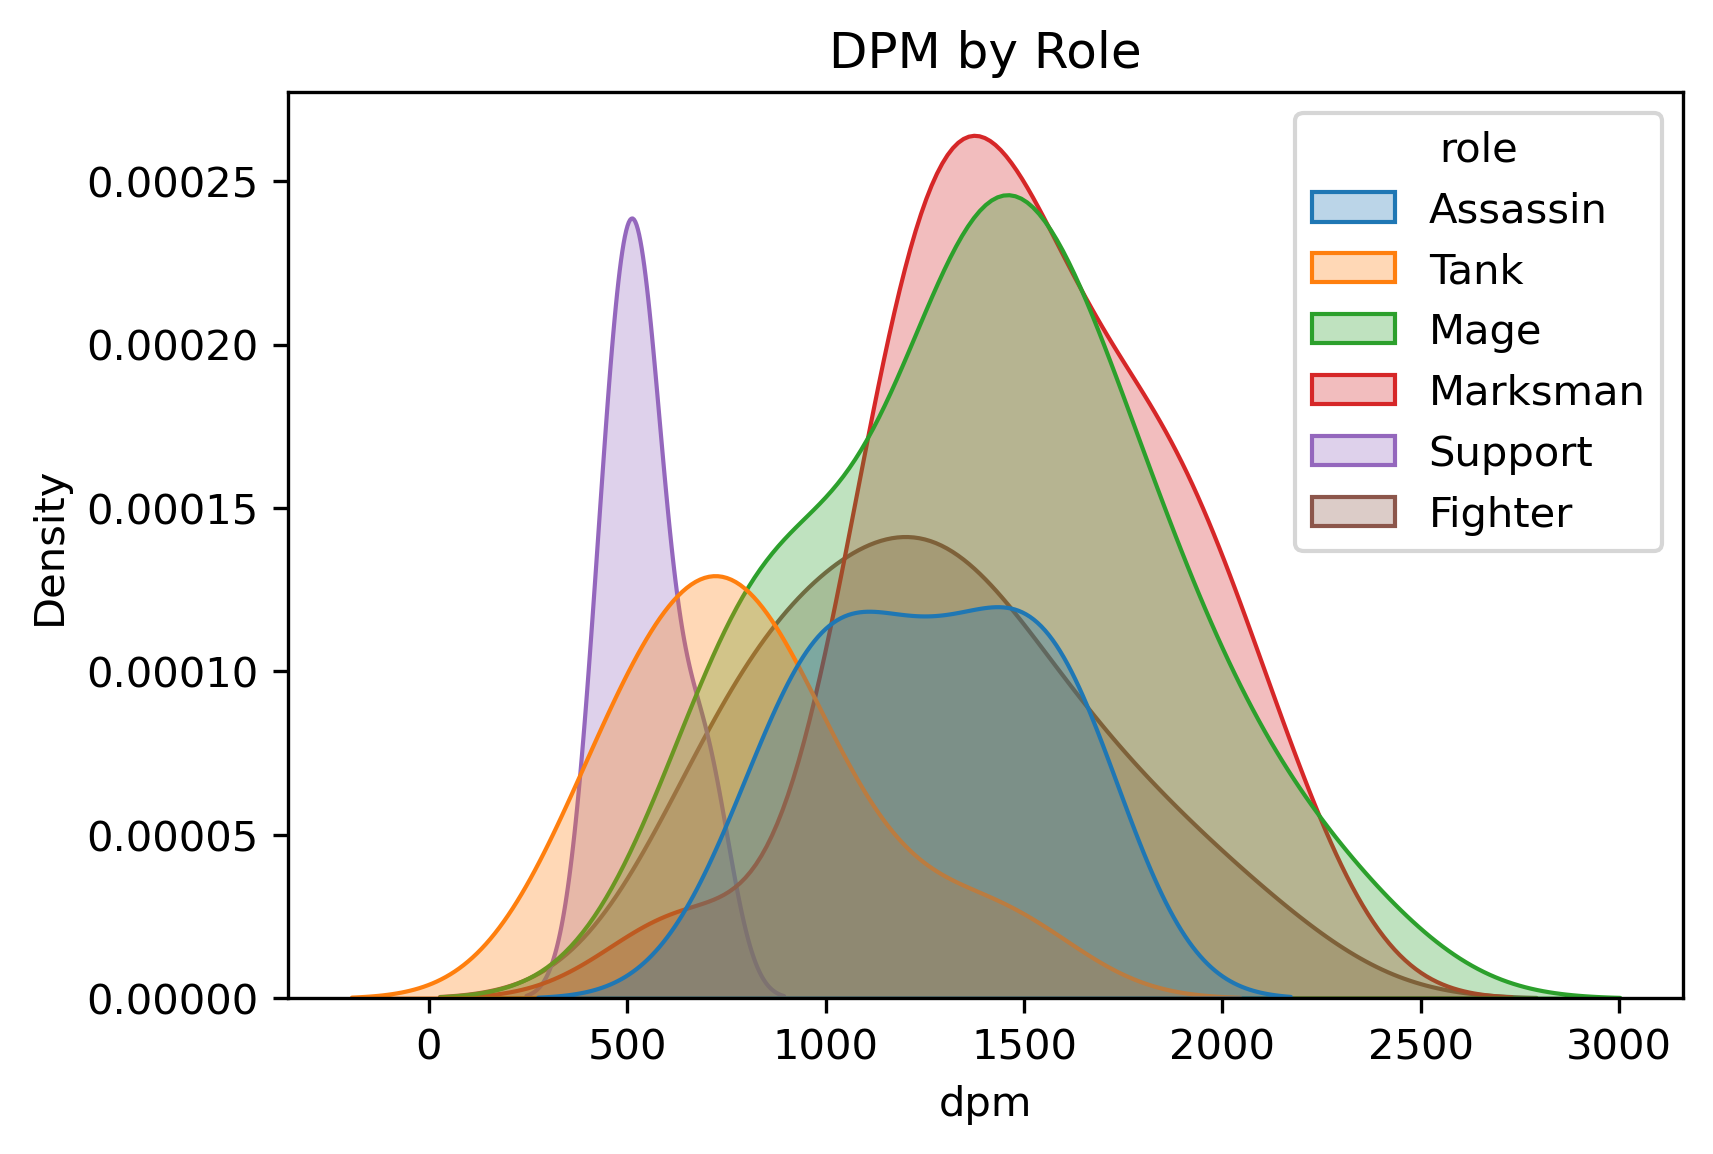

In [46]:
plt.figure(dpi=300)
sns.kdeplot(data=champion_win_damage,
           x='dpm',
           hue='role',
           fill=True,
           alpha=0.3)

plt.title('DPM by Role')
plt.show()

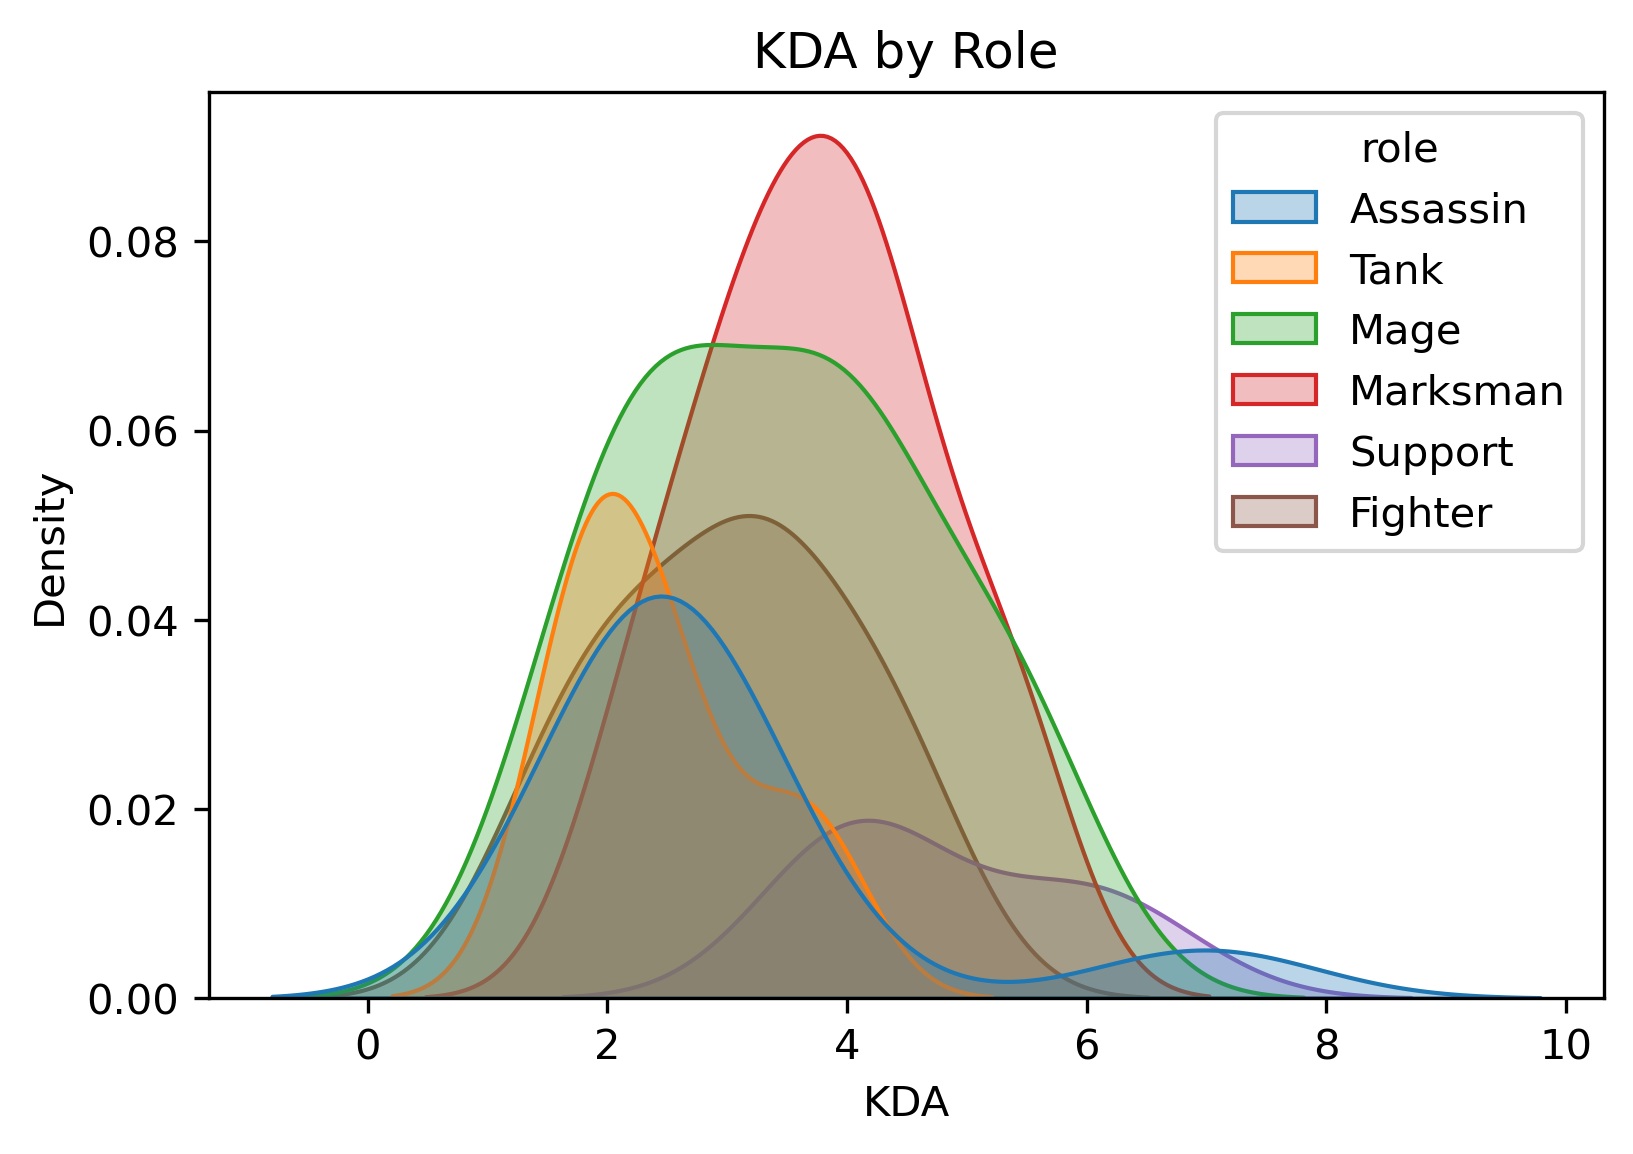

In [47]:
plt.figure(dpi=300)
sns.kdeplot(data=champion_win_damage,
           x='KDA',
           hue='role',
           fill=True,
           alpha=0.3)

plt.title('KDA by Role')
plt.show()

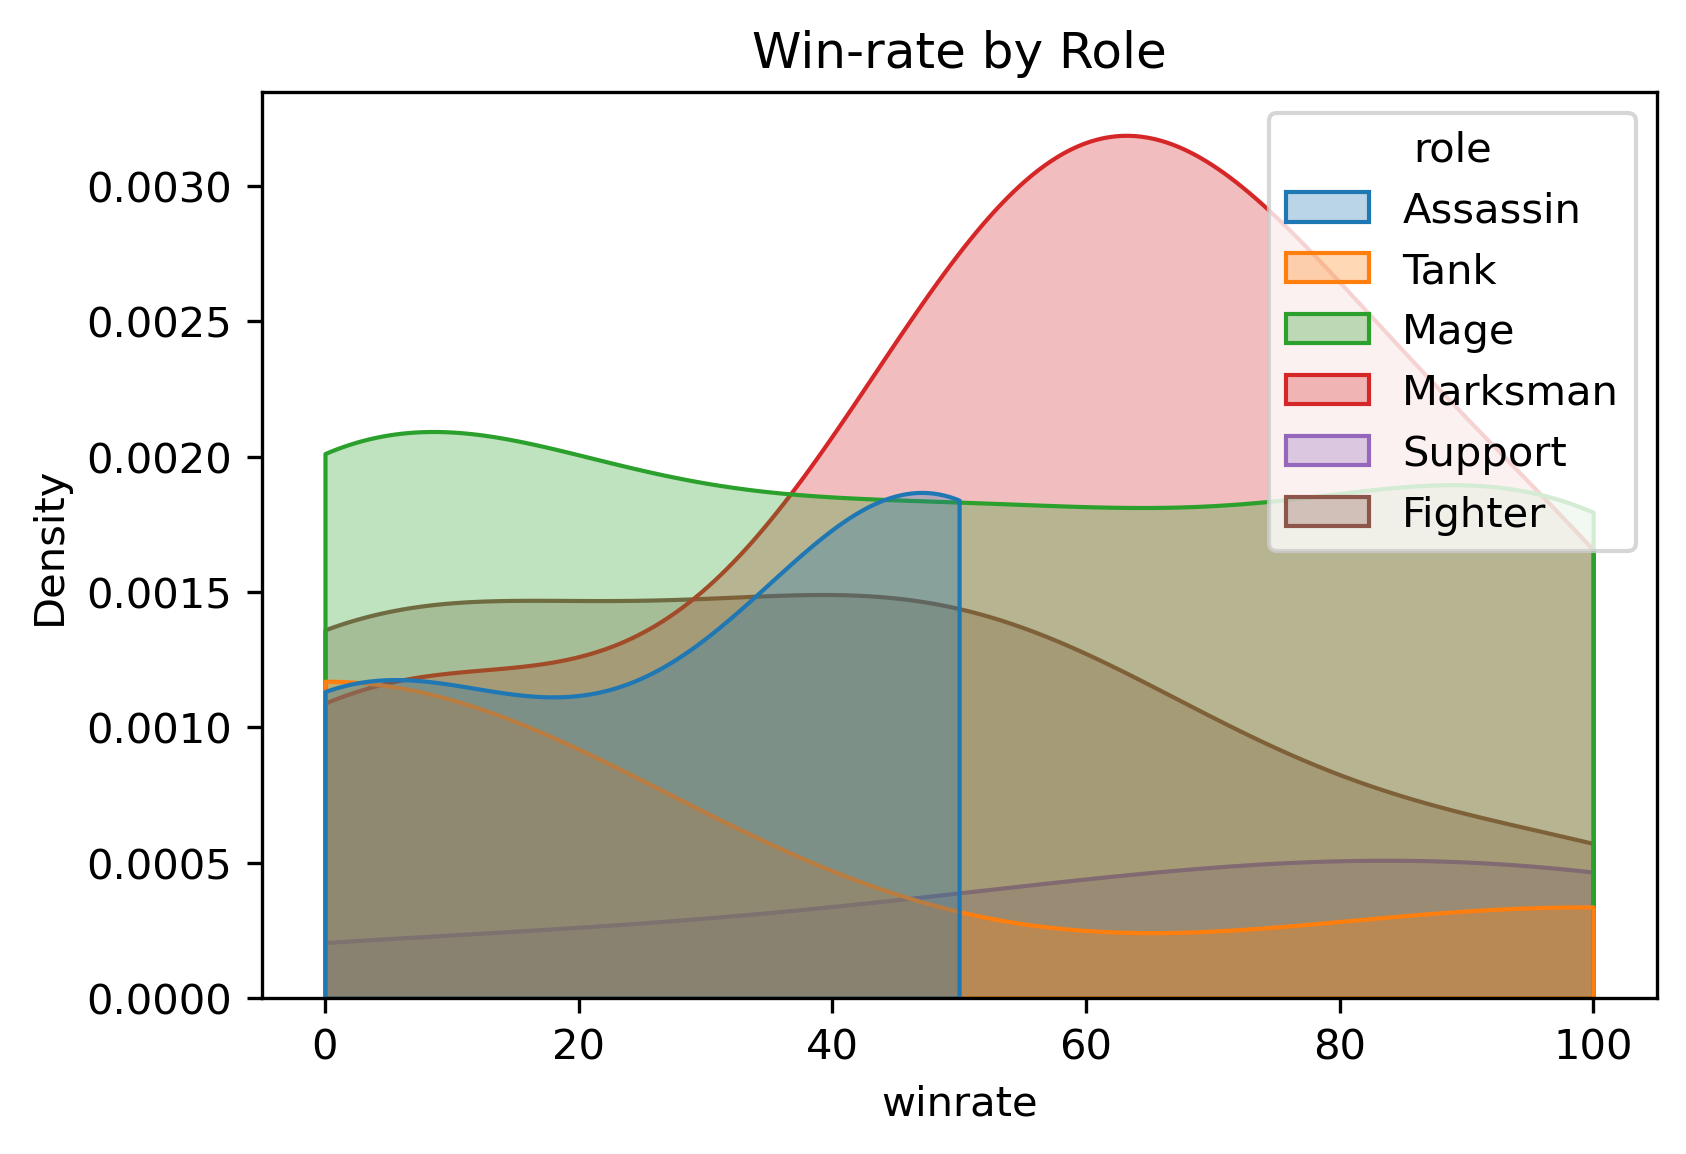

In [48]:
plt.figure(dpi=300)
sns.kdeplot(data=champion_win_damage,
           x='winrate',
           hue='role',
            fill=True,
            alpha=0.3,
           cut=0)

plt.title('Win-rate by Role')
plt.show()

## Scatterplots

In [49]:
time_win = data.groupby(['game_time_min', 'game_result'], as_index=False).agg({'date': pd.Series.count})
total_time_game = data.groupby('game_time_min', as_index=False).agg({'game_result': pd.Series.count})
total_time_game.rename(columns={'game_result': 'total_games'}, inplace=True)
time_win = time_win.merge(total_time_game, on='game_time_min')
time_win = time_win.rename(columns={'date': 'nr_games'})

In [50]:
time_win['winrate'] = time_win.nr_games / time_win.total_games * 100

# making sure time with one game and defeated come out with a 0% winrate
for x in range(0, len(time_win)):
    if time_win.game_result[x] == 'Defeat':
        if time_win.nr_games[x] == time_win.total_games[x]:
            time_win.loc[x, 'winrate'] = 0

In [51]:
# remove defeats from champions that already have 'victory' win-rate
for x in range(0, len(time_win)):
    try:
        if time_win.game_time_min[x+1] == time_win.game_time_min[x]:
            time_win.drop(x, axis=0, inplace=True)
    except KeyError:
        break
        
# reset index
time_win.reset_index(inplace=True)
time_win.drop(['index'], axis=1, inplace=True)

In [52]:
time_win_scatter = px.scatter(time_win,
                            x='game_time_min',
                            y='winrate',
                            size='total_games',
                            opacity=0.6,
                            height=650)
time_win_scatter.update_layout(title='Game Time vs. Win-Rate',
                             xaxis_title='Game Time (Minutes)',
                             yaxis_title='Win-Rate (%)')
time_win_scatter.show()

In [53]:
dmg_win_scatter = px.scatter(champion_win_damage,
                            x='dpm',
                            y='winrate',
                            color='champion',
                            size='dpm',
                            opacity=0.6,
                            height=650)
dmg_win_scatter.update_layout(title='Champion DPM vs. Win-Rate',
                             xaxis_title='Damage per Minute',
                             yaxis_title='Win-Rate (%)')
dmg_win_scatter.show()

In [54]:
dmg_win_scatter = px.scatter(champion_win_damage,
                            x='dpm',
                            y='winrate',
                            color='role',
                            size='dpm',
                            opacity=0.6,
                            height=650)
dmg_win_scatter.update_layout(title='DPM vs. Win-Rate by Role',
                             xaxis_title='Damage per Minute',
                             yaxis_title='Win-Rate (%)')
dmg_win_scatter.show()

In [55]:
dmg_kda_scatter = px.scatter(champion_win_damage,
                            x='KDA',
                            y='dpm',
                            color='champion',
                            size='dpm',
                            height=650,
                            opacity=0.6)
dmg_kda_scatter.update_layout(title='Champion KDA vs. DPM',
                             xaxis_title='KDA',
                             yaxis_title='Damage per Minute')
dmg_kda_scatter.show()

In [56]:
dmg_kda_scatter = px.scatter(champion_win_damage,
                            x='KDA',
                            y='dpm',
                            color='role',
                            size='dpm',
                            height=650,
                            opacity=0.6)
dmg_kda_scatter.update_layout(title='Champion KDA vs. DPM by Role',
                             xaxis_title='KDA',
                             yaxis_title='Damage per Minute')
dmg_kda_scatter.show()

In [57]:
kda_win_scatter = px.scatter(champion_win_damage,
                            x='KDA',
                            y='winrate',
                            color='champion',
                             size='KDA',
                            height=650,
                            opacity=0.6)
kda_win_scatter.update_layout(title='Champion KDA vs. Win-Rate',
                             xaxis_title='KDA',
                             yaxis_title='Win-Rate (%)')
kda_win_scatter.show()

In [58]:
kda_win_scatter = px.scatter(champion_win_damage,
                            x='KDA',
                            y='winrate',
                            color='role',
                             size='KDA',
                            height=650,
                            opacity=0.6)
kda_win_scatter.update_layout(title='Champion KDA vs. Win-Rate by Role',
                             xaxis_title='KDA',
                             yaxis_title='Win-Rate (%)')
kda_win_scatter.show()

# Regressions

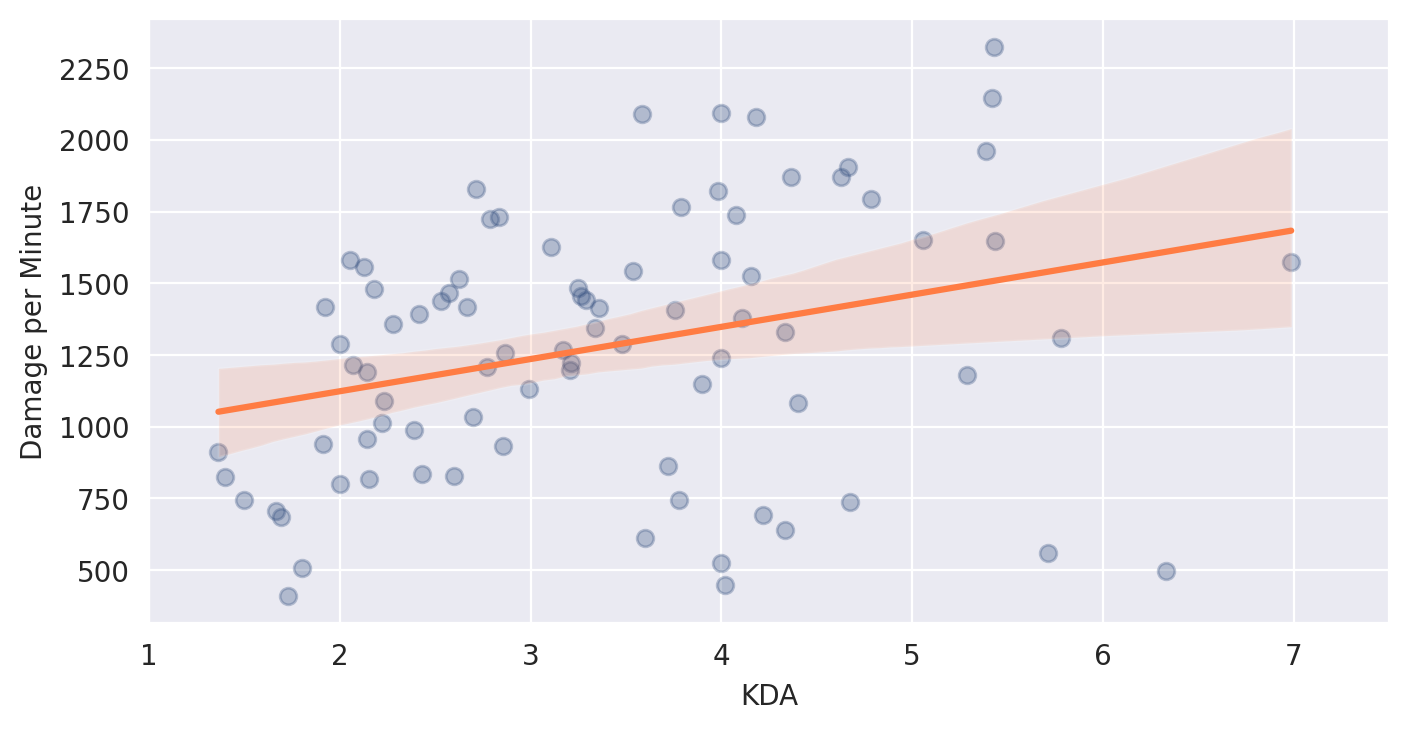

In [59]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.regplot(data=champion_win_damage,
               x='KDA',
               y='dpm',
               scatter_kws={'alpha': 0.3},
               line_kws={'color': '#ff7c43'},
                    color='#2f4b7c')
    ax.set(xlim=(1, 7.5),
           xlabel='KDA',
          ylabel='Damage per Minute')

In [60]:
regression = LinearRegression()

# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(champion_win_damage, columns=['KDA'])

# Response Variable or Target
y = pd.DataFrame(champion_win_damage, columns=['dpm'])

# Find the best-fit line
regression.fit(X,y)

# y-intercept
print(regression.intercept_)

# slope
print(regression.coef_)

# R-squared
regression.score(X,y)

[898.97504808]
[[112.26296737]]


0.0951484903808032

At a glance there seemed to be a relationship between champion <i>KDA</i> and <i>damage per minute</i>, however, the R-squared value was very low at <b>0.095</b>. Meaning there is a very small correlation between the two variables.

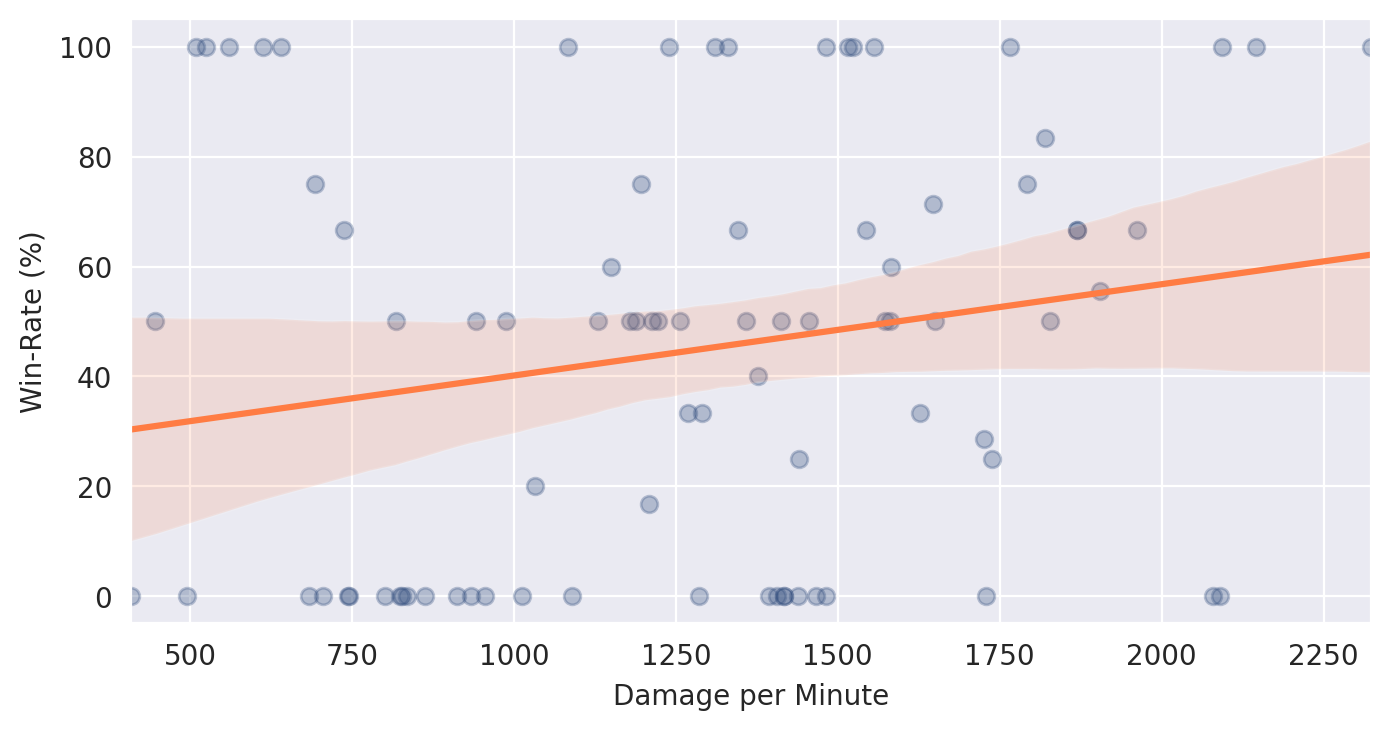

In [61]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.regplot(data=champion_win_damage,
               x='dpm',
               y='winrate',
               scatter_kws={'alpha': 0.3},
               line_kws={'color': '#ff7c43'},
                    color='#2f4b7c')
    ax.set(xlabel='Damage per Minute',
          ylabel='Win-Rate (%)')

In [62]:
regression1 = LinearRegression()

# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(champion_win_damage, columns=['dpm'])

# Response Variable or Target
y = pd.DataFrame(champion_win_damage, columns=['winrate'])

# Find the best-fit line
regression1.fit(X,y)

# y-intercept
print(regression1.intercept_)

# slope
print(regression1.coef_)

# R-squared
regression1.score(X,y)

[23.52218503]
[[0.01662784]]


0.039583013371681575

Looking at the scatter, there seems to be positive increase in win-rate the higher the damage per minute however the linear regression model showed that there was only a very small correlation between the two variables (R-squared: 0.04).

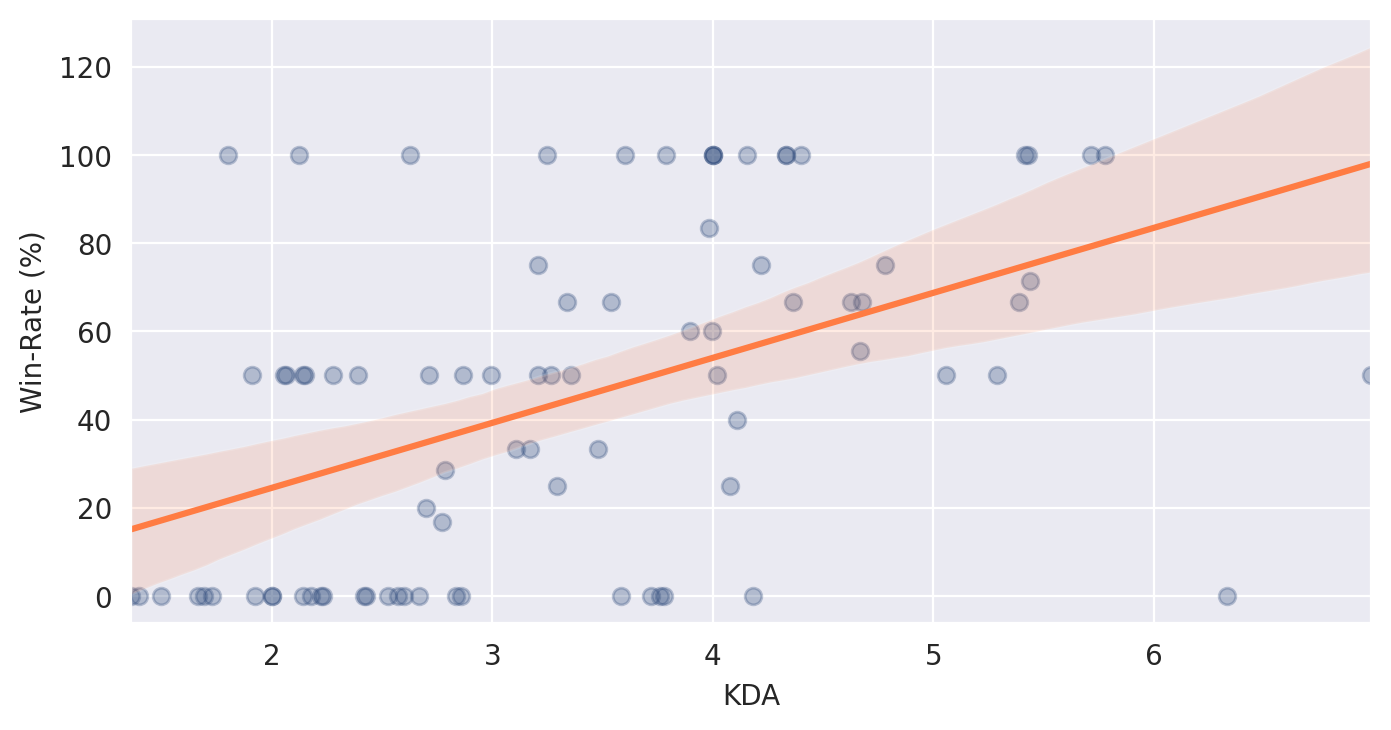

In [63]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.regplot(data=champion_win_damage,
               x='KDA',
               y='winrate',
               scatter_kws={'alpha': 0.3},
               line_kws={'color': '#ff7c43'},
                    color='#2f4b7c')
    ax.set(xlabel='KDA',
          ylabel='Win-Rate (%)')

In [64]:
regression2 = LinearRegression()

# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(champion_win_damage, columns=['KDA'])

# Response Variable or Target
y = pd.DataFrame(champion_win_damage, columns=['winrate'])

# Find the best-fit line
regression2.fit(X,y)

# y-intercept
print(regression2.intercept_)

# slope
print(regression2.coef_)

# R-squared
regression2.score(X,y)

[-4.96042969]
[[14.73861503]]


0.23478996140127728

Like the other previous regressions, the scatter shows a possible positive correlation between the two variables <i>KDA</i> and <i>win-rate</i>. Contrary to the previous regressions, the correlation for between the two is much higher with an R-squared value at 0.235.

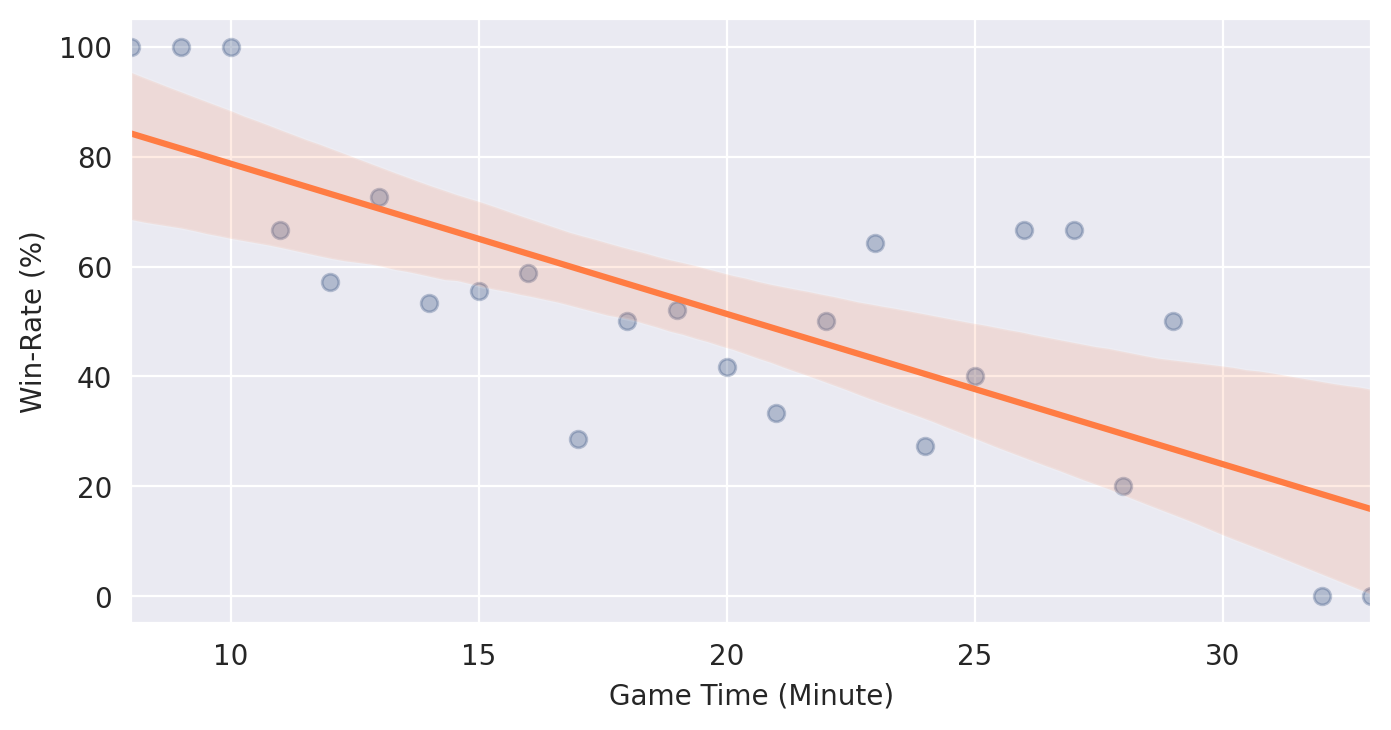

In [65]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.regplot(data=time_win,
               x='game_time_min',
               y='winrate',
               scatter_kws={'alpha': 0.3},
               line_kws={'color': '#ff7c43'},
                    color='#2f4b7c')
    ax.set(xlabel='Game Time (Minute)',
          ylabel='Win-Rate (%)')

In [66]:
regression3 = LinearRegression()

# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(time_win, columns=['game_time_min'])

# Response Variable or Target
y = pd.DataFrame(time_win, columns=['winrate'])

# Find the best-fit line
regression3.fit(X,y)

# y-intercept
print(regression3.intercept_)

# slope
print(regression3.coef_)

# R-squared
regression3.score(X,y)

[106.09048281]
[[-2.73577385]]


0.5674002120413035

R-Squared value is 0.57. Slope is -2.73.

## Multi-Variable Regression

In [67]:
target = champion_win_damage.winrate
features = champion_win_damage[['dpm', 'KDA']]

X_train, X_test, y_train, y_test = train_test_split(features,
                                                   target,
                                                   test_size=0.2,
                                                   random_state=10)

In [68]:
train_pct = len(X_train) / len(features) * 100
test_pct = len(X_test) / len(features) * 100
print(f'Training data is {train_pct}%')
print(f'Testing data is {test_pct}%')

Training data is 79.76190476190477%
Testing data is 20.238095238095237%


In [69]:
regression_multi = LinearRegression()
regression_multi.fit(X_train, y_train)
rsquared = regression_multi.score(X_train, y_train)

print(f'The r-squared value is {rsquared}')

The r-squared value is 0.24371380463080095


In [70]:
regression_coef = pd.DataFrame(data=regression_multi.coef_, index=X_train.columns, columns=['Coefficient'])
regression_coef

Coefficient
dpm         0.00
KDA        14.50

In [71]:
# Test KDA of 5.00
test_kda = 5.00
test_winrate = regression_multi.coef_[1] * test_kda

print(f'If a champion by the end of the match had a kda of {test_kda}, the chance they won would be {test_winrate:.3}%')

If a champion by the end of the match had a kda of 5.0, the chance they won would be 72.5%


In [72]:
predicted_values = regression_multi.predict(X_train)
residuals = (y_train - predicted_values)

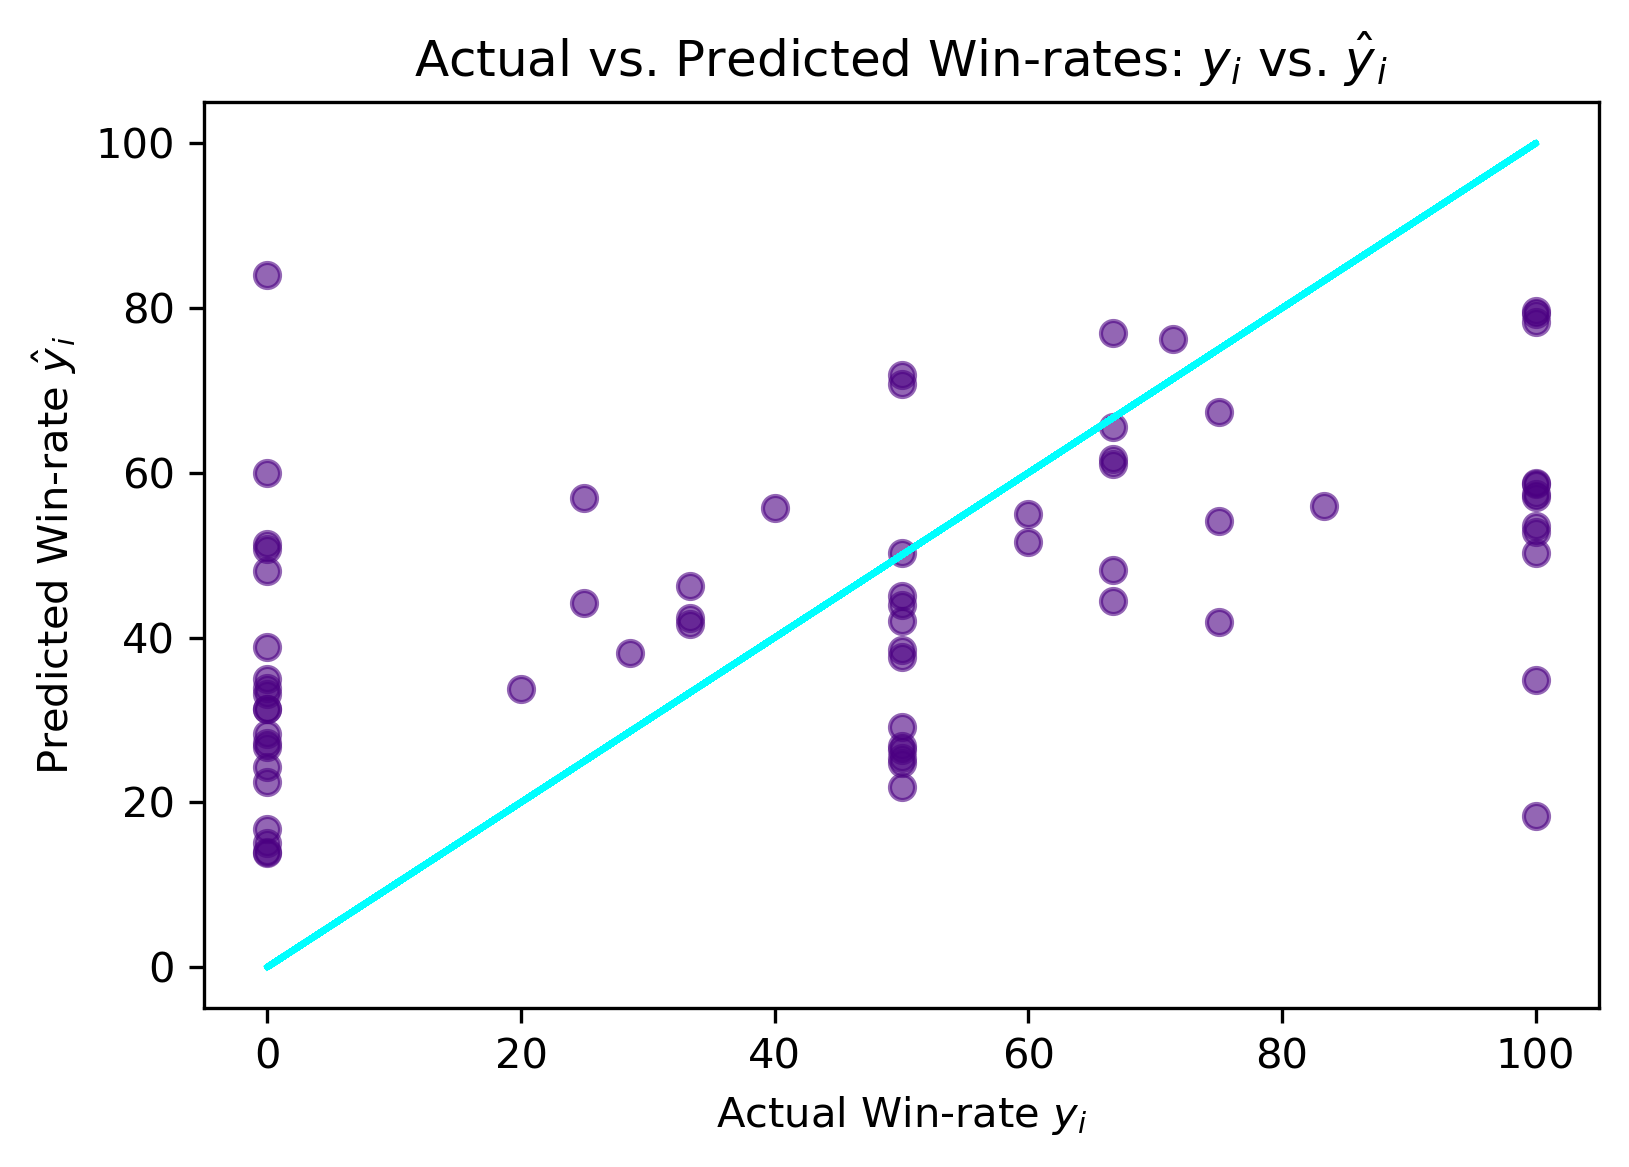

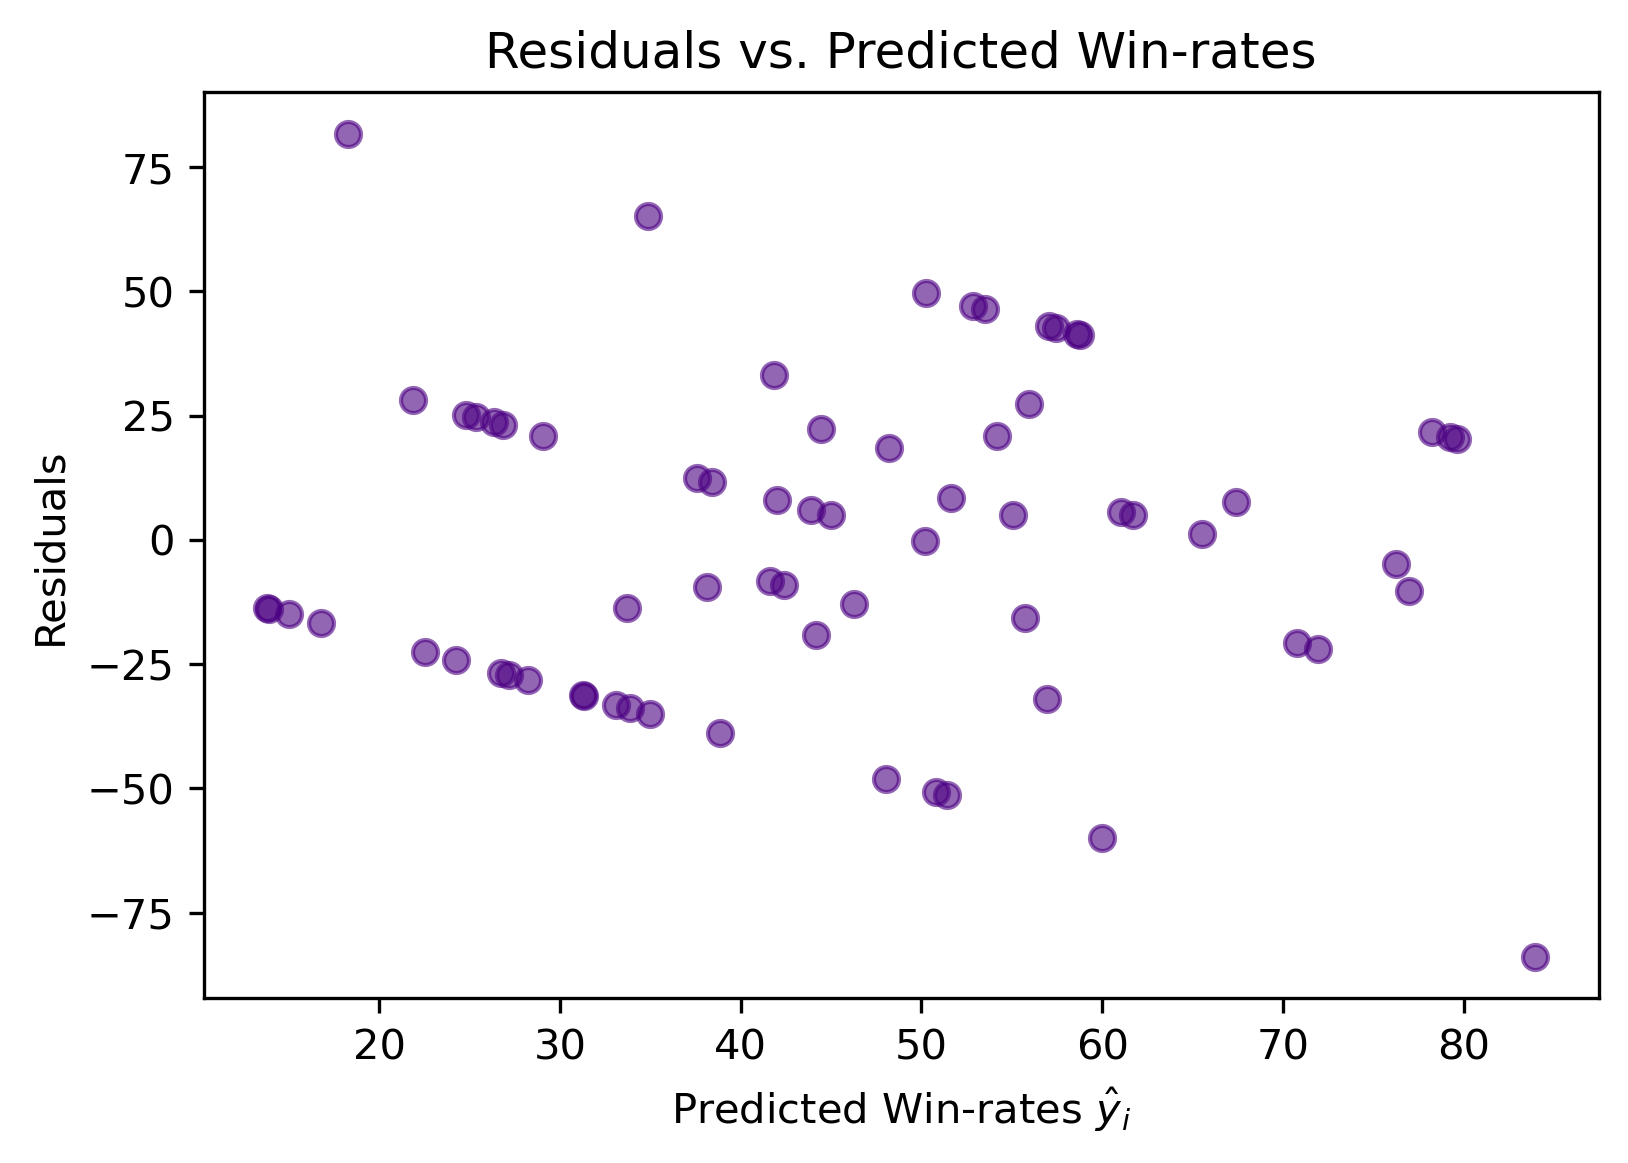

In [73]:
plt.figure(dpi=300)
plt.scatter(x=y_train, y=predicted_values, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, c='cyan')
plt.title('Actual vs. Predicted Win-rates: $y _i$ vs. $\hat y_i$')
plt.xlabel('Actual Win-rate $y _i$')
plt.ylabel('Predicted Win-rate $\hat y_i$')
plt.show()

plt.figure(dpi=300)
plt.scatter(x=predicted_values, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs. Predicted Win-rates')
plt.xlabel('Predicted Win-rates $\hat y_i$')
plt.ylabel('Residuals')
plt.show()

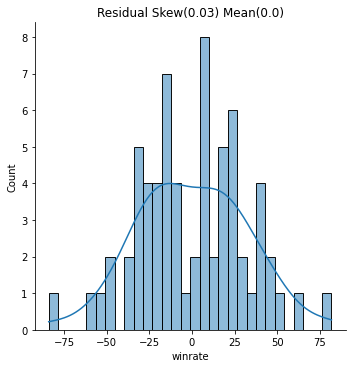

In [74]:
residual_mean = round(residuals.mean(), 2)
residual_skew = round(residuals.skew(), 2)

sns.displot(data=residuals,
           bins=30,
           kde=True)
plt.title(f'Residual Skew({residual_skew}) Mean({residual_mean})')
plt.show()

# Discussion

## Overall Stats

I usually play Aram games as a 5-man party  with friends so whenever we play we continue playing because we feel we are going to keep winning after the first match win or we play so we stop the lose streak. This would explain the average 4.1 games a day. A match usually lasts for around 20 minutes (average: 18 minutes, 51 seconds). Multiplying that by 4 that is around 1 hour, 20 minutes of straight gameplay. If I were to account for the match finding, champion select, and loading screen time the session would be around 1 hour 40 min. After that long is when we get burned out and stop playing.

The Aram win-rate from the 2 month-span is 49.4% which is essentially 50%. The game mode itself would explain part of the result. Aram randomly selects the champions each player plays thus, there is chance that I or another person would get a champion we do not know how to play proficiently. The same can be said for the opponent team. Aram is however a little forgiving in that we can reroll for another champion and trade with our team. There is then the concept of team composition. Sometimes even with champions we are proficient in, our team composition against the opponent is simply not favorable and we get out-pressured and lose. 

For example, if my team was all fighters, our attack range is melee ranged and our goal and the only way to engage on the team was to gap close and try to skirmish with them. However, the opposing team can be all ranged with consistent poke/chip damage and crowd-control abilities (slows, stun-locks, knock-backs). They would be able to bring us down to half health if they hit everything and by the time we engage or attempt to, the fight is already done since they have an overwhelming health advantage. This converts to more kills and more gold for the enemy into better items for the enemy team and repeat. We can't change our composition because we don't know what the enemy team is like. Therefore there is a form of luck involved in Aram which explains the 50% win-rate. 

My average KDA ((kills + assist) / death) is 3.71. It is very rare for someone's KDA to be less than 1.0 in this gamemode because the Aram is a 1-lane map so there is always a chance for a kill and an assist. A KDA less than 1.0 would mean either the enemy team was super oppressive or the player is just running into the enemy and dying, not contributing at all. In my opinion, my average KDA is average. A good KDA would be greater than 4.0. 

An example would be:


In [75]:
data.sort_values('KDA', ascending=False).head()

date game_result  game_time_min champion  kills  deaths  assists  \
14  2021-07-31     Victory             10  Nidalee     12       1        8   
168 2021-06-22     Victory              8   Graves      7       1        6   
42  2021-07-24     Victory             14  Caitlyn     12       4       29   
150 2021-06-25     Victory             17    Xayah      8       4       29   
90  2021-07-10     Victory             18   Syndra     11       4       25   

     damage   KDA  
14    15137 20.00  
168    8321 13.00  
42    32096 10.25  
150   21836  9.25  
90    31455  9.00

## Champion and Roles

Unsurprisingly, my most played champion was LeBlanc, an assassin at 12 games. I love playing LeBlanc because she is very fun to play and has room for a decent amount of outplay potential. Although my win-rate with her was 33.33% unfortunately. Looking at the most damage done in any game, LeBlanc takes 2 of the 5 top spots dealing 80k and 64k total damage. The other spots were taken by 2 marksmen (Ezreal, Jinx) and a mage (Twisted Fate). In contrast, if you look at the damage per minute(dpm), she does 1.6k dpm on average. Scaling it up to 20 minutes, I do around 32k total damage on LeBlanc. In terms of the role itself, 1.6k is way beyond the average dpm I provide on assassins as a whole.   Those two games were just very outstanding games from me. 

Now let's look at the other two roles, marksmen and mages. Of the total games played, 41.4% were played as marksmen and  24.9% were mages. More than half my games were marksmen or mages. And of the champions that I have a 100% win-rate on, 41.2% were mages, 23.5% were marksmen. I feel more comfortable playing mages and marksmen probably because they are ranged and I can clearly see what I am doing in a fight. Furthermore, I consisently deal 1.5~1.6k dpm on those roles and have a higher damage limit compared to any other role (Tank, Support, Assassin, Fighter). This makes sense because marksmen and mages are known for being damage carries providing consistent damage, burst damage, or damage over time moreso than the others. Looking at the win-rates by roles however, mages for me are more spread out whereas most marksmen games I can win around 75% of the time. 

Looking at the weaker end of the spectrum, I do less damage on tanks and supports which is given. Tanks and supports lack damage in their ability kit. Instead, tanks are more focused on the damage taken and how they long they can stand in the frontline and provide space for the damage-dealers. Supports are to help provide healing, shielding, or to providing crowd-control to help peel enemies off allies. It would be strange if a tank or support did a lot of damage. I tend to lose more on fighters and tanks as well. This goes back to the idea of comfort where I find it hard to see what I am doing in fights because they are usually melee characters. Consequently, I do not play them as much and am not practiced with them leading to more losses. I do have a net positive win-rate on supports but the games I've played with them is very small so it is hard to say right now. 

## Relationships and Explanations

Lastly, I wanted to see if there was a correlation between the three variables (win-rate, dpm, KDA). I thought there would be a positive correlation between KDA and dpm because the longer you stay alive, the more damage you are able to consistently provide. Upon running regressions on them, the R-squared value between KDA and dpm was 0.09. There is a very small positive correlation between them but isn't enough to say anything about. A Potential effect could be that the less you die, the weaker your items because in Aram you cannot buy new items unless you die thus a lower dpm. 

Regressions were run for KDA vs. win-rate and dpm vs. win-rate and game time vs. win-rate. The R-squared values were 0.23, 0.04, and 0.57 respectively. There was a greater correlation between KDA and win-rate than dpm. The former makes sense, because the connotation between a high KDA means that you are winning fights and killing off your enemies more than you are dying. You are getting more gold when this happens and are able to buy better items earlier than the opponent when you die and snowballing fights. The latter was a little unexpected. I initially thought there to be a bigger correlation than shown because the more damage you are able to consistently provide, would that not pressure the enemy and consequently kill them after? A possibly explanation would be that even if you are dealing out consistent damage, it may not be killing them exactly. For example, it could be bringing them down to 30% health but if there was a healer, the effect in health difference can be mitigated and the fights would still be 5v5. You might also be hitting tanks which have high health-regeneration and the other enemies are wiping your team. Surprisingly, game time had the greatest correlation. Looking at the regression, there was a negative correlation, where the longer the game time, the more likely I am to lose a game. I would think I did better the longer the game because of better items and the champions I play mostly (mages and marksmen) scale very well late into the game. An explanation for this would be the game itself. It is a team game so even though I may be doing well, if my team is not then we are more likely to lose. Also, when the game gets longer, tanks get harder to kill, mages do significantly more burst damage, respawn timers are much longer. This means that one bad fight would lose the game and in such cases, a pick on an opponent would leave a significant detrimental effect on the opponent. In terms of my party then, we are bad at playing longer games it looks like.

A multivariable regression was run to determine the effects of dpm and KDA on win-rate for any given champion I play. Similar to the single variable comparisons, KDA played a much bigger role than dpm. Looking at the R-squared values, the model does slightly better than just KDA vs. win-rate 0.24 if not the same. The model was checked for skewness which showed a very small skew at 0.03 meaning it was overall a decent model.

 # Conclusion


I was curious about my Aram win-rates and stats because no other site would show a cumulative data. To that extent, I tried to do my own exploration. From the last 2 months spanninng June to August of 2021, I won 49.4% of my Aram games with an average of 4 games a day. My most played champion was LeBlanc, and I played mostly mages and marksmen. My best role is most definitely marksmen and then mages. My worst role is the tank role and then the fighter role. There is currently 156 champions in the game. The current data only has around 250 data points which is small in my opinion. If I was able to get a bigger dataset with all my past games, then there should be more evidence for current observed trends and I can deduce more from it. All in all, I can say that Aram really is random as it says, although my marksman surely carry my stats to that 50% mark.